In [682]:
#!pip install opencv-contrib-python
#!pip install moviepy

In [683]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
from moviepy.editor import VideoFileClip, AudioFileClip,concatenate_videoclips
#import tqdm
#import time

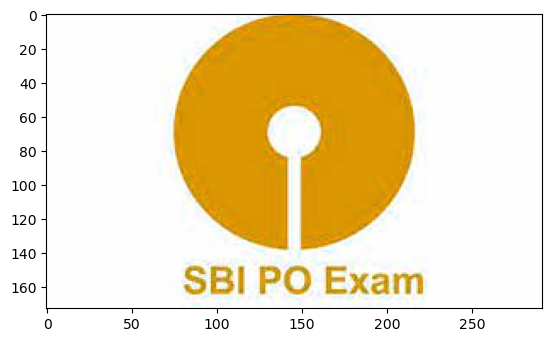

In [684]:
img=str(1)+'.jpg'
img=cv.imread(img)
plt.imshow(img)

In [685]:
audio=AudioFileClip('audio.mp3')
print(audio.duration)
video_duration=audio.duration
audio

34.54


In [686]:
imgs=[]
a=1
b=4+1 #number of images + 1
txt1="Subscribe my Youtube Channel "
txt2="     Samachar Hut"
video_width=900
video_height=1600
for i in range(a,b):
    if i>1:
        img2=img1
    else:
        img2=str(1+(i)%(b-1))+'.jpg'
        #print(img2)
        img2=cv.imread(img2)
        img2=cv.resize(img2,(video_width,video_height))
    img1=str(i)+'.jpg'
    #print(img)
    img1=cv.imread(img1)
    img1=cv.resize(img1,(video_width,video_height))
    
    
    #print(img1.shape)
    #imgs.append(img1)
    for k in range(1,40):
        if i%2==0:
            img=cv.addWeighted(img1,0.025*k,img2,1-0.025*k,0)
            
        else:
            img=cv.addWeighted(img1,1-0.025*k,img2,0.025*k,0)
        #adding text
        r=int((img1[350][350]+250)[0])
        g=int((img1[350][350]+250)[1])
        b=int((img1[350][350]+250)[2])
        if i%2==0:
            cv.putText(img,txt1,(1*(40-k),(40-k)*20-50),cv.FONT_HERSHEY_COMPLEX,1.5,
                       (0,0,0),2)
            cv.putText(img,txt2,(1*(40-k),(40-k)*20),cv.FONT_HERSHEY_COMPLEX,2,
                   (100,200,100),4)
            
        imgs.append(img)
        
        if k%2==0:
            img[k]=img[k]+[10*k+k+k]
            img[k]=img[k]%250
            imgs.append(img)
        #if k%7==0:
        else:
            img[k]=img[k]+[10*k+k+k]
            img[k]=img[k]%250
            imgs.append(img)
    #plt.imshow(img)
    

In [687]:
len(imgs)

312

In [688]:
img[0][0][1]

250

In [689]:
k=img[0]+[248+248+248]
k=k%250
k[1]

array([246, 244, 238], dtype=int32)

In [690]:
while len(imgs)<16*int(video_duration):
    imgs1=imgs
    imgs=imgs + imgs1
len(imgs)

624

In [691]:
imgs=imgs[:16*int(video_duration)]
len(imgs)

544

In [692]:
fps=int(len(imgs)/int(video_duration))
fps

16

In [693]:
min=1
sec=15
#fps=10
#width=imgs[0].shape[1]
#height=imgs[0].shape[0]
video=cv.VideoWriter('video.mp4',
                    cv.VideoWriter_fourcc(*'mp4v'),fps,(video_width,video_height))
#num_frames=(int(video_duration))*fps
#repeated_images = np.tile(imgs, (num_frames // len(imgs), 1, 1,1 ))
#for img in repeated_images: 
for img in imgs:
    video.write(img)
    #print(i)
    #print(img)
    #time.sleep(0.5)
cv.destroyAllWindows()
video.release()

In [694]:
video=VideoFileClip('video.mp4')
print(video.duration)
video

34.0
